## Week 7-2: Nonparametric method - Kernel density estimation

_Bo Y.-C. Ning_

#### Last time
* MCMC
* Note: when calculate ACF, remove burnin first

#### Today
* Empirical cumulative distribution function
* Histogram
* KDE

#### Reference
* (__vdVAS__) Aad van der Vaart (1998). Asymptotic Statistics. _Cambridage Series in Statistical and Probabilistic Mathematics_.
* Larry Wasserman (2005) All of nonparametric statistics. _Springer_.
* Lecture notes from Yen-Chi Chen: https://faculty.washington.edu/yenchic/19A_stat535/Lec2_density.pdf
* Max Köhler, Anja Schindler and Stefan Sperlich (2014) A Review and Comparison of Bandwidth Selection Methods for Kernel Regression. _International Statistical Review_ 82:243--274
* Alexander Goldenshluger, Oleg Lepski (2011). Bandwidth selection in kernel density estimation: Oracle inequalities and adaptive minimax optimality. _AoS_ 39:1608--1632
* Suzanne Varet, Claire Lacour, Pascal Massart, and Vincent Rivoirard (2019). Numerical performance of Penalized Comparison to Overfitting for multivariate kernel density estimation. [Link](https://www.ceremade.dauphine.fr/~rivoirar/PCO-num.pdf)
* Johannes Schmidt-Hieber (2020). Nonparametric regression using deep neural networks with ReLU activation function. _AoS_ 48:1875--1897

### Empirical cumulative distribution function

Suppose we observe one dimensional random samples $X_1, \dots, X_n$ from a commmon distribution function $F$, $F$ is completely unknown. Then a natural estimator for the underlying distribution $F$ is the _empirical cumulative distribution function_ is defined as
$$
\mathbb{F}_n(x) = \frac{1}{n} \sum_{i=1}^n \mathbb{1}\{X_i \leq t\}
$$

Text(0.5, 1.0, 'ECDF (blue) vs normal CDF (red)')

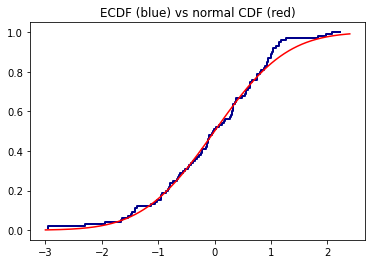

In [3]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib import pyplot as plt
np.random.seed(2022)

# obtain ECDF
X = np.random.normal(0, 1, 100)
ecdf = ECDF(X)

# obtain normal quantile
import scipy.stats as stats
v = np.linspace(-3, 2.4, 1000)
q = stats.norm.cdf(v)


plt.step(ecdf.x, ecdf.y, color = "darkblue", linewidth = 2)
plt.plot(v, q, color = "red", )
plt.title("ECDF (blue) vs normal CDF (red)")

1. Uniform version of the law of large numbers for empirical processes

__Theorem 1__ (Glivenko-Cantelli). If $X_1, X_2, \dots$ are i.i.d. random variables with distribution function $F$, then 
$$
\|\mathbb{F}_n - F\|_\infty := \sup_x|\mathbb{F}_n(x) - F(t)| \overset{a.s.}{\to} 0.
$$

2. Donsker's functional central limit theorem 

__Theorem 2__ (Donsker). If $X_1, X_2, \dots$ are i.i.d. ranodm variables with distribution $F$, then the sequence of empirical process 
$$
\sqrt{n} (\mathbb{F}_n - F) \leadsto \mathbb{G}_F \text{in} D[-\infty, \infty],
$$
where $\mathbb{G}_F$ is a Gaussian process with zero mean and covariance structure $K(x_i, x_j) = \text{cov}(\mathbb{G}(x_i), \mathbb{G}(x_j)$ and $D[-\infty, \infty]$ is the Skorokhod space, the space containing the collection of càdlàg functions (continue à gauche, limite à droite).

- For starters, read the empirical processes in Ch. 19 of vdVAS 
- A more advanced reference is the book _Weak convergence and empirical processes_ by Aad van der Vaart & Wellner


Consider the following question: suppose $X_1, X_2, \dots$ are sorted into increasing order, what is the probability the ECDF put mass on the value between $x_i$ and $x_{i+1}$. The answer is zero. This answer is unsatisfactory, as one one want to predict new samples based on the old ones. Another approach is to use histograms.

### Histograms

Suppose we observe samples $X_1, X_2, \dots, X_n \in [0,1]$, so the density $f(x), x \in [0, 1]$. 

Assume:

- $f(x)$ is smooth and bounded 
- Its derivative $|f'(x)| \leq L$ is also bounded; $f$ is Lipschitz

To estimate $f$ using histogram, we cut the interval $[0, 1]$ into $M$ evenly-spaced intervals

$$
I_1 = [0, 1/M), \quad I_2 = [1/M, 2/M),\quad \dots, \quad I_M = [(M-1)/M, 1]
$$

Then the histogram density estimator is given by
$$
\hat f_n(x) = \frac{\text{# of obs. in $I_k$}}{\text{total # of obs.}} \times \frac{1}{\text{size of each bin}}
= \frac{M}{n} \sum_{i=1}^n \mathbb{1}\{X_i \in I_k\}
$$

<AxesSubplot:ylabel='Density'>

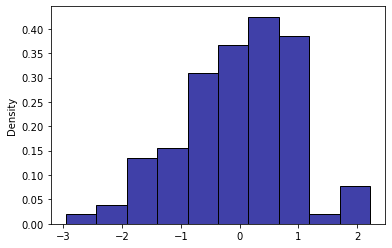

In [35]:
import seaborn as sns

# plot histogram (bin = "auto")

sns.histplot(X, stat = "density", color = 'darkblue')

<AxesSubplot:ylabel='Density'>

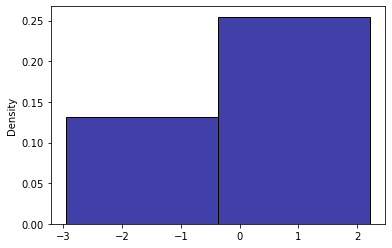

In [38]:
# plot histogram (bin = 2)

sns.histplot(X, stat = "density", bins = 2, color = 'darkblue')

<AxesSubplot:ylabel='Density'>

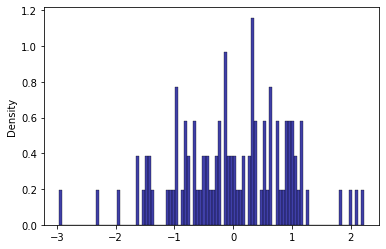

In [39]:
# plot histogram (bin = the sample size)

sns.histplot(X, stat = "density", bins = X.size, color = 'darkblue')

### How to choose the bin size?

From the above three plots, clearly, one cannot choose the size of the bin to be too large (e.g., $M = n$) and too small (e.g., $M = 2$). Intuitively, there exists some optimal bin size to be chosen. 

Let's study the histogram estimator:

__Bias part__

\begin{align}
\mathbb{E}(\hat f_n(x)) & = M P(X_i \in I_k)  \quad (\text{Why?})\\
& = M \int_{\frac{k-1}{M}}^{\frac{k}{M}} f(x) dx \\
& = M \Big[ F\big(\frac{k}{M}\big) - F\big(\frac{k-1}{M}\big) \Big] \\
& = \frac{F\big(\frac{k}{M}\big) - F\big(\frac{k-1}{M}\big)}{\frac{k}{M} - \frac{k-1}{M}}
\end{align}
By the mean-value theorem, there exists $x^\star \in [(k-1)/M, k/M)$ such that 

$$
\frac{F\big(\frac{k}{M}\big) - F\big(\frac{k-1}{M}\big)}{\frac{k}{M} - \frac{k-1}{M}} = f(x^\star)
$$

Then the bias of the histogram estimator is
\begin{align}
\mathbb{E}(\hat f_n(x)) - f(x)
= f(x^\star) - f(x)
= \frac{f(x^\star) - f(x)}{x^\star - x} (x^\star - x)
= f'(x^{\star\star})(x^\star - x),
\end{align}
where $x^{\star\star} \in [x^\star, x]$ (if $x^\star > x$, $x^{\star\star} \in [x, x^\star]$). 
The last line can be bounded by 
$$
|f'(x^{\star\star})||x^\star - x| \leq L |x^\star - x| \leq \frac{L}{M},
$$
as we assumed $|f'(t)| \leq L$. 

Therefore, the bias is of the order $L/M$, as $M \to \infty$, then the bias goes to 0. Then, should we choose $M$ as large as possible? 

__Variance part__

\begin{align}
\text{Var}(\hat f_n(x)) & = \text{Var} \Big( \frac{M}{n} \sum_{i=1}^n \mathbb{1}\{X_i \in I_k\} \Big) \\
& = \frac{M^2}{n} P(X_i \in I_k) (1 - P(X_i \in I_k))  \quad (\text{why?}) 
\end{align}

From the bias part, $M P(X_i \in I_k) = f(x^\star)$, thus we have
\begin{align}
\text{Var}(\hat f_n(x)) & = \frac{M^2}{n} \frac{f(x^\star)}{M} \big(1 - \frac{f(x^\star)}{M} \big) \\
& = \frac{M f(x^\star)}{n} - \frac{f^2(x^\star)}{n}.
\end{align}

This result suggest that as $M \to \infty$, $\text{Var}(\hat f_n(x)) \to \infty$. 

__MSE__

We calculate the MSE (mean squared error): 
$$
\text{MSE}(\hat f_n(x)) = \Big(\mathbb{E}(\hat f_n(x)) - f(x)\Big)^2 + \text{Var}(\hat f_n(x))
= \frac{L^2}{M^2} + \frac{M f(x^\star)}{n} - \frac{f^2(x^\star)}{n}
\leq \frac{L^2}{M^2} + \frac{M \max_x f(x)}{n}.
$$

If $M$ is large, we have a small bias and a large variance, this is the _undersmoothing_ case; if $M$ is small, we have a small variance but a large bias, this is the _oversmoothing_ case. By minimizing the MSE, we obtain 

$$
M^{\text{opt}} = \Big(\frac{2nL}{\max_x f(x)} \Big)^{1/3}
$$

Although we do not know $f$, the result suggests that the optimal bins should change with the sample size $n$ and 
$
\text{MSE}(\hat f_n(x)) \lesssim n^{-2/3}.
$
This implies the rate of convergence is $n^{-1/3}$, which is slower than the parametric rate $1/\sqrt{n}$. 

### Kernel density estimator

The histogram estimator we introduced is not smooth. Often, one wants to obtain a smooth density. One can use the _kernel density estimator_ (KDE), which not only provides a smooth estimator, but soon we will see it also improves the convergence rate. 

The KDE is defined as 

$$
\hat f_n(x) = \frac{1}{nh} \sum_{i=1}^n K\big(\frac{x - X_i}{h}\big),
$$
where $h$ is the _bandwidth_ to be chosen, $K(u)$ is a kernel function satisfying:

- smooth 
- symmetric $\int uK(u) = 0$ (e.g., Gaussian)
- $\int K(u) = 1$


The KDE smoothes all the density bumps and then sum up all the bumps together. 

(Source: Page 132 of L. Wasserman. _All of nonparametric statistics_)
<img src="kde.png" width=50%>  

In [79]:
# generate sample from two mixture normal 0.4 N(-2, 1) + 0.6 N(2, 1)

N = 500 # sample size
np.random.seed(202205) # set random seed
u = np.random.uniform(0, 1, N) #Sample N random uniforms u from [0, 1]
X_mtr = [] # create an empty array
for i in range(N):
    if u[i] <= 0.4:
        X_mtr = np.append(X_mtr, np.random.normal(-2, 1, 1))
    else: 
        X_mtr = np.append(X_mtr, np.random.normal(2, 1, 1)) 

<AxesSubplot:ylabel='Density'>

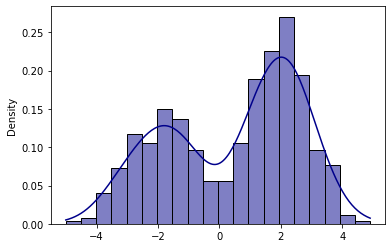

In [83]:
sns.histplot(X_mtr, bins = 20, kde = True, stat = "density", color = 'darkblue')

# use Gaussian kernel

#### Kernel functions

Commenly used kernel functions are 

_Gaussian kernel_
$$
K(u) = \frac{1}{\sqrt{2\pi}} \exp \big(- \frac{u^2}{2}\big)
$$

_Uniform kernel_
$$
K(u) = \frac{1}{2} \mathbb{1}\{-1\leq u \leq 1\}
$$

_Epanechnikov kernel_
$$
K(u) = \frac{3}{4} \max\{1 - u^2, 0\}
$$

The Epanechnikov kernel has the lowest mean square error.

<img src="kernel.png" width=70%>

Source: Yen-Chi Chen's notes (https://faculty.washington.edu/yenchic/19A_stat535/Lec2_density.pdf)

### Analysis of KDE

We study the mean integrated square error (MISE):

$$
\text{MISE}(\hat f_n(x)) = \int \text{MSE} (\hat f_n(x)) dx
$$

Let's fix $x = x^\star$ for now and study MSE part first. 

__Bias part__

\begin{align}
\mathbb{E}(\hat f_n(x^\star)) & = \mathbb{E}\Big(\frac{1}{nh} \sum_{i=1}^n K\big(\frac{X_i - x^\star}{h} \big) \Big)  \\
&= \frac{1}{hn} \sum_{i=1}^n \mathbb{E} K\big(\frac{X_i - x^\star}{h} \big) \\
&= \frac{1}{h} \int K\big(\frac{x - x^\star}{h} \big) f(x) dx 
\end{align}
Let $u = (x - x^\star)/h$ and change variables from $x$ to $u$, note that $x = uh + x^\star$, then we arrive at
\begin{align}
\frac{1}{h} \int K(u) f(uh + x^\star) d (uh + x^\star)
= \int K(u) f(uh + x^\star) du.
\end{align}

Then the bias is given by
\begin{align}
\mathbb{E}(\hat f_n(x^\star)) - f(x^\star) = \int K(u) \big[f(uh + x^\star) - f(x^\star)\big] du,
\end{align}
where we used the fact that $\int K(u) = 1$.

The remaining work is to bound $f(uh + x^\star) - f(x^\star)$. One could apply the Taylor's theorem to obtain 
$$
f(uh + x^\star) - f(x^\star) = uh f'(x^\star) + \frac{(uh)^2}{2} f''(x^\star) + \frac{(uh)^3}{6} f'''(x^\star) + \cdots. 
$$
Then, one has to assume all the derivatives $f^{(j)}(u)$, $j = 1, 2, \dots$, i.e., $f^{(j)} = f'(u)$, $f^{(2)} = f''(u)$, etc, are bounded. 

Instead, we assume $f$ is $\beta$-Hölder, i.e., $f \in \mathcal{H}(\beta, L)$. For now, let's assume $\beta = 2$ for simplicity. A more general result for any value of $\beta$ will be given at the end of our derivation. 

__Fact 1.__ If $f \in \mathcal{H}(\beta, L)$, then for all $x \in (0, 1)$, 
$$
\Bigg| f(x) - \sum_{j=0}^{\lfloor \beta \rfloor} \frac{f^{(j)}(y)}{j !} (x - y)^j  \Bigg|
\leq L |x - y|^\beta, 
$$
for some constant $L$ and $\lfloor \beta \rfloor$ is the largest integer smaller or equals to $\beta$. 

With Fact 1 and $\beta = 2$, we can write 

\begin{align}
f(uh + x^\star) - f(x^\star)
= \underbrace{f(uh + x^\star) - \sum_{j = 0}^2 \frac{f^{(j)} (x^\star)}{j!} (uh + x^\star - x^\star)^j}_{(I)} 
+ \underbrace{\sum_{j = 0}^2 \frac{f^{(j)} (x^\star)}{j!} (uh + x^\star - x^\star)^j  - f(x^\star)}_{(II)}
\end{align}

Since $f \in \mathcal{H}(2, L)$, using Fact 1, $(I) \leq L(uh)^2$.
To bound $(II)$, we have
\begin{align}
(II) & = f(x^\star) + uf'(x^\star) h + \frac{f''(x^\star)}{2} (uh)^2 - f(x^\star) \\
& = uf'(x^\star) h + \frac{f''(x^\star)}{2} (uh)^2.
\end{align}

Therefore, by combining the two upper bounds, 
\begin{align}
\mathbb{E}(\hat f_n(x^\star)) - f(x^\star) 
& \leq L h^2 \int u^2 K(u)du + f'(x^\star) h \int u K(u) du + \frac{h^2 f''(x^\star)}{2} \int u^2 K(u) du \\
& = L h^2 \int u^2 K(u)du + \frac{h^2 f''(x^\star)}{2} \int u^2 K(u) du.
\end{align}

__Assumption 1.__ $\int u^2 K(u) du = \mu < \infty$.

With Assumption 1, the last display is bounded by 
$$
L h^2 \mu + \frac{h^2 f''(x^\star)}{2}\mu,
$$ 
which suggests that if $h \to 0$, the bias $\to 0$ for any fixed $x^\star$. 

__Variance part__

Now let's study the variance part in the MSE. 

\begin{align}
\text{Var}(\hat f_n(x)) & = \text{Var} 
\Big( 
\frac{1}{nh} \sum_{i=1}^n K \big( \frac{x_i - x^\star}{h} \big)
\Big) \\
& = \frac{1}{n^2h^2} \sum_{i=1}^n \text{Var}\Big(K \big( \frac{x_i - x^\star}{h} \big)\Big) \\
& = \frac{1}{nh^2} \text{Var} \Big(K \big( \frac{x - x^\star}{h} \big) \Big)\\
& = \frac{1}{nh^2} \Bigg\{
\mathbb{E} \Big(K^2 \big( \frac{x - x^\star}{h} \big) \Big) - 
\Big[\mathbb{E} \Big(K \big( \frac{x - x^\star}{h} \big) \Big) \Big]^2
\Bigg\} \\
& \leq \frac{1}{nh^2} \mathbb{E} \Big(K^2 \big( \frac{x - x^\star}{h} \big) \Big) \\
& = \frac{1}{nh^2} \int K^2 \big(\frac{x - x^\star}{h} \big) f(x) dx.
\end{align}

Again, we change of variance $u = (x - x^\star)/h$, then the last line in the display above can be written as 

\begin{align}
\frac{1}{nh} \int K^2(u) f(uh + x^\star) du
\end{align}

Using Fact 1, $f \in \mathcal{H}(2, L)$, and triangle inequality, 
$$
f(uh + x^\star) \leq L(uh)^2 + \sum_{j=0}^2 \frac{f^{(j)}(x^\star)}{j!} (uh)^j.
$$

Thus, 
\begin{align}
\frac{1}{nh} \int K^2(u) f(uh + x^\star) du
& \leq 
\frac{1}{nh} \int K^2(u) 
\Big[
f(x^\star) + uh f'(x^\star) + (uh)^2 f''(x^\star)
\Big] du \\
& = \frac{1}{nh}f(x^\star) \int K^2(u) du + \frac{1}{n} f'(x^\star) \int u K^2(u) du + \frac{h}{n} f''(x^\star) \int u^2 K^2(u) du \\
& = \frac{1}{nh}f(x^\star) \int K^2(u) du + \frac{h}{n} f''(x^\star) \int u^2 K^2(u) du.
\end{align}

__Assumption 2.__ Assuming $\int u^\beta K^2(u) du < \infty$ (here, $\beta = 2$).

With Assumption 2, the last display can be written as 

\begin{align}
C_1 \frac{1}{nh}f(x^\star) + C_2 \frac{h}{n} f''(x^\star),
\end{align}
where we denote $\int K^2(u) du = C_1$ and $\int u^2 K^2(u) = C_2$.

Note that  the second term in the last display is much smaller than the first term if $h \to 0$. 

Finally, we obtain the upper bound for the MISE, which is given by 

\begin{align}
\text{MISE}(\hat f_n(x) )
= \int
\Big\{
h^4  \mu
\big(
L + \frac{f''(x)}{2}
\big)^2
+ 
\frac{C_1}{nh} f(x) + \frac{C_2h}{n} f''(x)
\Big\} dx.
\end{align}

Apply the inequality $(a+b)^2 \leq 2a^2 + 2b^2$ and using the fact that $\int_0^1 dx = 1$, as $x \in [0, 1]$, and $\int_0^1 f(x) dx = 1$,
as $f(x)$ is a density function, the last display can be bounded by 

\begin{align}
h^4 \mu \Big(2L^2 + \frac{\int (f''(x))^2 dx}{2} \Big)
+ \frac{C_1}{nh} + \frac{C_2h}{n} \int f''(x) dx.
\end{align}

__Assumption 3.__ Assuming $\int (f''(x))^2 dx = \|f''(x)\|^2_2 < \infty$.

With Assumption 3, since $\mu$, $L$ are both constants, $h = o(1)$, we simply the expression a little bit and obtain 
$$
\text{MISE}(\hat f_n(x) ) 
\leq C_3 h^4 + \frac{C_4}{nh} + \text{small}.
$$

By minimizing the MISE, we obtain the optimal bandwidth is 

$$
h^{\text{opt}} \asymp n^{-1/5}.
$$
Then $\text{MISE}(\hat f_n(x)) = O(n^{-4/5})$. The convergence rate when $f\in \mathcal{H}(\beta, L)$ and $\beta = 2$ is $n^{-2/5}$. Comparing to the rate of the histogram estimator, $n^{-1/3}$, the rate for KDE is slightly faster. Both rates are slower than $1/\sqrt{n}$, the parametric rate. This suggests there is a price to pay for making lesser assumptions.

In general, if $f$ in $\beta$-Hölder, by following a similar proof, we can show that the convergence rate is 

$$
n^{- \frac{\beta}{2\beta + 1}}.
$$

For example, when $\beta = 1$, the rate is $n^{-1/3}$, as for the histogram estimator. When $\beta = 2$, the rate is $n^{-2/5}$, which is the rate of KDE obtained above. 

The following theorem suggests that the KDE achieves the minimax rate, meaning that it gives the optimal rate of convergence. 

__Theorem 3.__ (Page 135 of Wasserman (2015)). Let $\mathcal{F}$ be the set of all probability density function and let $f^{(\beta)}$ denote the $\beta$-th derivative of $f$. Define 

$$
\mathcal{F}_j(c) = \big\{ f\in \mathcal{F}: \int |f^{(\beta)}|^2 dx \leq c^2 \big\}.
$$

For any estimator $\hat f_n$, 

$$
\sup_{f \in \mathcal{F}_\beta(c)}
\mathbb{E}_f \int \big( \hat f_n(x) - f(x) \big)^2 dx \geq b n^{- \frac{\beta}{2\beta+1}},
$$
where $b > 0$ is a universal constant that depends only on $\beta$ and $c$. 

#### How to select the bandwidth?

The derivation above suggest that the optimal choice of bandwidth should depends on $n$. It also depends on the unknown quantity $\int (f''(x))^2 dx$, the overall curvature of density $f$. Indeed, how to select bandwidth is an active research area in statistics. 
Here are a couple of common approaches:

- _Rule of thumb_. This strategy is motivated by selecting the optimal bandwith for estimating the PDF of a univariate Gaussian density with the choice of the Gaussian kernel. It is suggested to choose 
$$
\hat h = 1.05 \hat \sigma n^{-1/5}.
$$
One can replace $\hat \sigma$ by the interquartile range [IQR](https://en.wikipedia.org/wiki/Interquartile_range)/1.34, this leads to 

$$
\hat h = 0.79 \hat{\text{IQR}} n^{-1/5}.
$$

Later Silverman noticed that this bandwidth often oversmooth and miss the multi-modality so he
recommended to revise it as

$$
\hat h = 0.9 \min\{\hat \sigma, \hat{\text{IQR}}\} n^{-1/5}.
$$

This choice is known as the _Silverman’s rule of thumb_.

- _Plug-in method_. An intuitive approach is to plug-in a consistent estimator of $f''(x)$. However, a major challenge is that one needs to specify another bandwidth for estimating the second derivative.

- _Least squared cross-validation_. The LSCV method is to use leave-one-out CV to estimate the integral $\int \hat f_n(x) f(x) dx$, a quantity arised in MISE. More details, please read Section 2.2.3 in Yen-Chi Chen's notes.

- _Lepski's method_. The approach is proposed by Goldenshluger and Lepski (2011). The method treats the bandwidth selection problem as a model selection problem. In the paper, they propose a new selection procedure for a set of kernel estimators. A nice summary of this method can be found in Varet et al. (2019).

- _Penalized Comparison to Overfitting (PCO) method_. Recently Varet et al. (2019) compared the PCO method with other methods including the Plug-in method, cv, and Lepski's method. Through simulation studies, they found the PCA method outperform other methods, in particular for estimating a multivariate density function. 

Speaking of estimating a multivariate density function, the convergence rate for $d$-dimensional density using KDE is $n^{- \beta/(2\beta + d)}$, which is super slow when $d$ becomes large. This is known as _the curse of dimensionality_ phenomena. This rate matches with the minimax rate. A recent seminal work by Schmidt-Hieber (2020) showed that it is possible to get a faster rate using the deep neural networks with RELU activation function. 